<a href="https://colab.research.google.com/github/dftow01/dataengineering/blob/main/A194855_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT 1 - PART 2**

**1. Data Acquisition (Web Scraping)**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
def get_hotel_info(page):
    url = f'https://www.booking.com/searchresults.en-gb.html?ss=Kuala+Lumpur%2C+Kuala+Lumpur+Federal+Territory%2C+Malaysia&efdco=1&label=bra115jc-1DCAEoggI46AdIM1gDaKEBiAEBmAEJuAEHyAEM2AED6AEBiAIBqAIDuAKVvMq6BsACAdICJDNiNjRkNjNhLTVhODgtNDMyMS1hOTI5LTc1YTA2Y2VkYzdlNdgCBOACAQ&sid=8c6109f51b64dc2a1c4fbdd1c8ff750f&aid=2425901&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2403010&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=ffac2fca71a80160&ac_meta=GhBmZmFjMmZjYTcxYTgwMTYwIAAoATICZW46Bkt1YWxhIEAASgBQAA%3D%3D&checkin=2025-01-30&checkout=2025-01-31&group_adults=2&no_rooms=1&group_children=0'

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    }
    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.content, 'html.parser')

    hotels = soup.find_all('div', class_='c066246e13 d8aec464ca')

    hotel_data = []
    for hotel in hotels:
        name_tag = hotel.find('h3', class_='aab71f8e4e')
        name = name_tag.get_text(strip=True) if name_tag else 'No name'
        rating_score_tag = hotel.find('div', class_='a3b8729ab1 d86cee9b25')
        rating_score = rating_score_tag.get_text(strip=True) if rating_score_tag else 'No rating score'
        rating_count_tag = hotel.find('div', class_='abf093bdfe f45d8e4c32 d935416c47')
        rating_count = rating_count_tag.get_text(strip=True) if rating_count_tag else 'No rating count'
        hotel_data.append([name, rating_count, rating_score])

    return hotel_data


In [ ]:
all_hotels = []
for page in range(1, 6):
      hotels = get_hotel_info(page)
      all_hotels.extend(hotels)


In [ ]:
df = pd.DataFrame(all_hotels, columns=['Hotel_Name', 'Rating_Count', 'Rating_Score'])
df

,Hotel_Name,Rating_Count,Rating_Score
0,City Apartment At Agile Residence KLOpens in n...,4 reviews,Scored 1010
1,Axon Residence KLCC - KL HOMEOpens in new window,141 reviews,Scored 9.09.0
2,Crown Suites Tropicana The Residence KLCC Kual...,"3,026 reviews",Scored 8.68.6
3,Cosmo Hotel Kuala LumpurOpens in new window,"1,570 reviews",Scored 6.96.9
4,"Capri by Fraser, Bukit BintangOpens in new window","2,693 reviews",Scored 8.88.8
...,...,...,...
120,MOV Hotel Kuala LumpurOpens in new window,"2,597 reviews",Scored 7.97.9
121,Hilton Kuala LumpurOpens in new window,"2,833 reviews",Scored 8.78.7
122,Quill Suites KLCCOpens in new window,983 reviews,Scored 8.58.5
123,"AnCasa Hotel Kuala Lumpur, ChinatownOpens in n...","2,143 reviews",Scored 8.08.0


**2. Text Cleaning**

The word 'reviews' in each ratiing count values are redundant thus are removed

In [ ]:
import re

In [ ]:
df['Rating_Count'] = df['Rating_Count'].str.replace(" reviews", "", regex=False)

The rating score values have redundant decimal numbers and the word 'Scored' which are both thus removed

In [ ]:
def clean_rating_score(score):
    score = score.replace("Scored ", "").strip()
    match = re.search(r"\d+\.\d+", score)
    if match:
        numeric_score = match.group(0)
        return numeric_score
    else:
        return score

df['Rating_Score'] = df['Rating_Score'].apply(clean_rating_score)

**3. Data Scaling**

The rating count values are scaled down to decimal numbers with 2 decimal places

In [ ]:
df['Rating_Count'] = pd.to_numeric(df['Rating_Count'].str.replace(',', '', regex=False), errors='coerce')
df['Rating_Count'] = df['Rating_Count'] / 1000
df['Rating_Count'] = df['Rating_Count'].round(2)
df.rename(columns={'Rating_Count': 'Rating_Count (k)'}, inplace=True)

In [ ]:
df

,Hotel_Name,Rating_Count (k),Rating_Score
0,City Apartment At Agile Residence KLOpens in n...,0.00,1010
1,Axon Residence KLCC - KL HOMEOpens in new window,0.14,9.09
2,Crown Suites Tropicana The Residence KLCC Kual...,3.03,8.68
3,Cosmo Hotel Kuala LumpurOpens in new window,1.57,6.96
4,"Capri by Fraser, Bukit BintangOpens in new window",2.69,8.88
...,...,...,...
120,MOV Hotel Kuala LumpurOpens in new window,2.60,7.97
121,Hilton Kuala LumpurOpens in new window,2.83,8.78
122,Quill Suites KLCCOpens in new window,0.98,8.58
123,"AnCasa Hotel Kuala Lumpur, ChinatownOpens in n...",2.14,8.08


**4. Downloading the data**

In [ ]:
df.to_csv("KL_hotels.csv", index=False)

In [ ]:
sorted_df = df.sort_values(by='Rating_Score', ascending=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

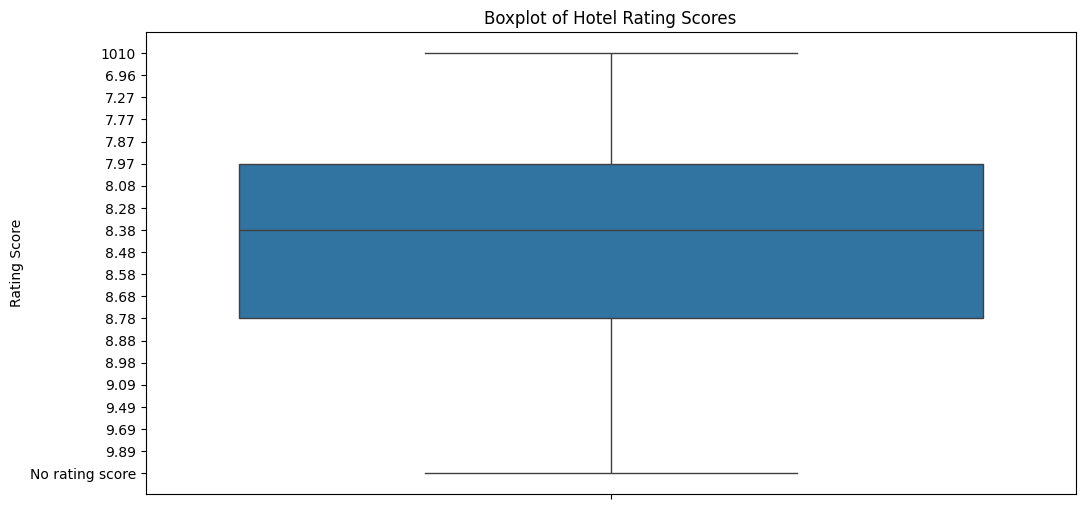

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=sorted_df['Rating_Score'])
plt.title('Boxplot of Hotel Rating Scores')
plt.ylabel('Rating Score')
plt.show()

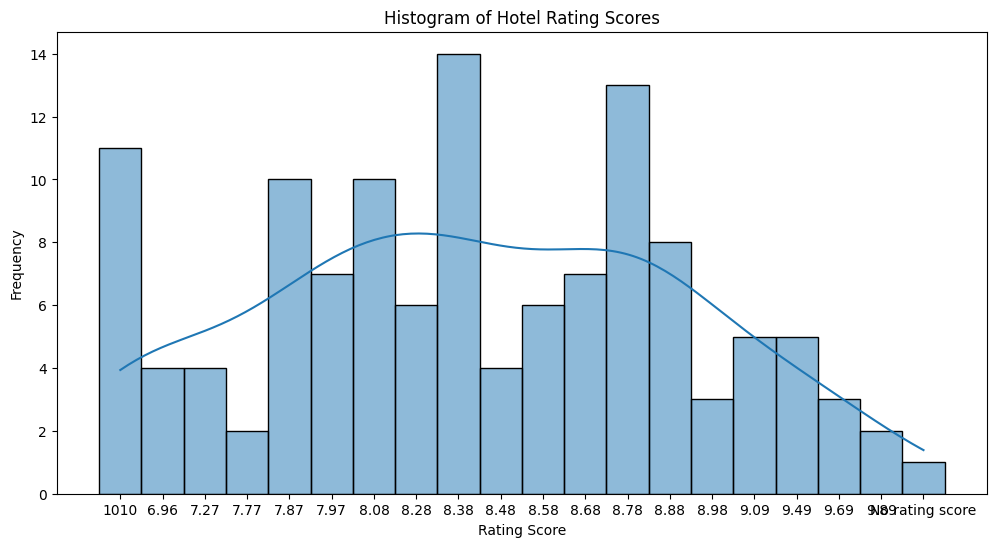

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(sorted_df['Rating_Score'], bins=10, kde=True)
plt.title('Histogram of Hotel Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

**There are no significant outliers in this data portion. As seen in the boxplot, the minimum value for rating score is 7.17 wheres as the maximum value is 9.89 . In the histogram, the data is shown to follow a normal distribution showing a bell curve pattern with a slight flunctuation at its minimum tail due to a high number of hotels achieving the minimum score.**

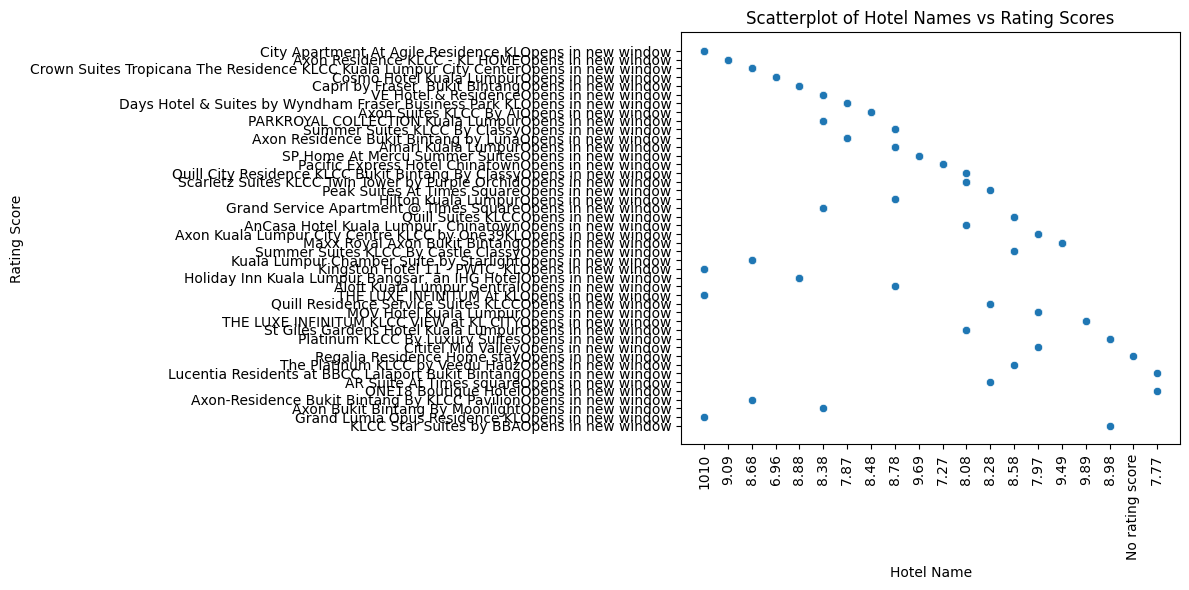

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Rating_Score'], y=df['Hotel_Name'])
plt.xticks(rotation=90)
plt.title('Scatterplot of Hotel Names vs Rating Scores')
plt.xlabel('Hotel Name')
plt.ylabel('Rating Score')
plt.tight_layout()
plt.show()


**As shown in the scatter plot, there are no significant outliers. All hotels in this dataset obtained rating scores within the normal distribution range**